In [10]:
import numpy as np
import torch
from tqdm import tqdm

from matplotlib import pyplot as plt

from dataset import MedMNISTv2
from models import UNet

In [2]:
net = UNet(in_channels=1, out_channels=1)
checkpoint = torch.load("logs/checkpoint.pt", map_location="cpu")
net.load_state_dict(checkpoint["net_state_dict"])
print(checkpoint['epoch'])

timesteps = 1000
beta = torch.linspace(1e-4, 0.02, timesteps)

38


000, 0.0000: 100%|██████████| 1000/1000 [00:09<00:00, 105.54it/s]


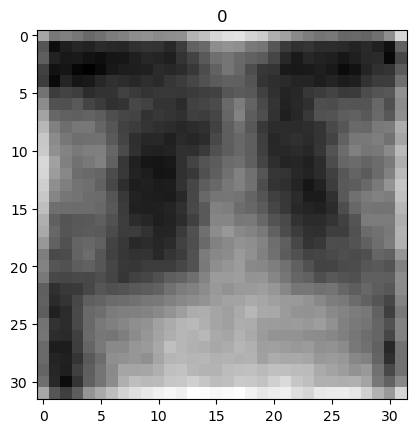

In [29]:
x_t = torch.randn(1, 1, 32, 32)
with torch.inference_mode():
    steps = tqdm(range(0, timesteps)[::-1])
    for t in steps:
        eps = net(x_t)
        alpha_t = 1-beta[t]
        alpha_bar_t = torch.prod(1-beta[:t+1])
        z = torch.randn(1, 1, 32, 32)
        sigma_t = torch.sqrt(beta[t]) if t > 0 else 0
        x_t = 1/torch.sqrt(alpha_t)*(x_t-(1-alpha_t)/torch.sqrt(1-alpha_bar_t)*eps) + sigma_t*z
        steps.set_description(f"{t:03d}, {sigma_t:.4f}")

plt.figure()
plt.imshow(x_t.detach().cpu().numpy()[0,0], cmap='gray')
plt.title(f"{str(t)}")
plt.show()